### 0. Importar las librerías

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

---

# 1. Cargar el dataset

In [31]:
# Cargar el dataset
datos = pd.read_csv('datos.csv')

datos

,AF365,AF450,35 deg,42 deg,Grupo
0,2.320158,1.229614,13.01,19.39,0
1,1.529274,0.616514,8.18,24.78,0
2,1.908257,0.955847,7.75,16.90,0
3,1.590625,1.018495,4.10,16.30,0
4,1.617071,1.242961,5.76,21.05,0
...,...,...,...,...,...
119,4.093525,3.037288,3.97,5.35,2
120,4.730000,3.040000,7.04,14.44,2
121,4.010000,4.110000,6.65,17.37,2
122,3.200000,2.360000,6.70,10.57,2


In [32]:
# Contar el número de instancias de cada grupo
datos['Grupo'].value_counts()

1    62
0    48
2    14
Name: Grupo, dtype: int64

---

# 2. Análisis exploratorio (EDA)

In [33]:
# Dataset completo
datos.describe()

,AF365,AF450,35 deg,42 deg,Grupo
count,124.000000,124.000000,124.000000,124.000000,124.000000
mean,2.575719,1.683305,7.269597,14.861048,0.725806
std,0.814076,0.731116,2.899653,5.746477,0.654425
min,0.410494,0.270591,2.100000,3.700000,0.000000
25%,2.061781,1.292338,5.457500,10.552500,0.000000
50%,2.550161,1.633922,6.700000,14.675000,1.000000
75%,3.051504,1.942651,8.630000,18.592500,1.000000
max,4.855556,6.458824,17.290000,32.480000,2.000000


In [34]:
# Grupo de control
datos[datos['Grupo'] == 0].describe()

,AF365,AF450,35 deg,42 deg,Grupo
count,48.000000,48.000000,48.000000,48.000000,48.0
mean,2.102746,1.236893,8.748333,19.910833,0.0
std,0.679359,0.442148,3.088467,4.551754,0.0
min,0.410494,0.270591,3.320000,11.860000,0.0
25%,1.681601,0.972846,6.617500,16.635000,0.0
50%,2.109467,1.233760,8.585000,19.415000,0.0
75%,2.515000,1.434447,10.497500,22.087500,0.0
max,3.747126,2.417640,17.290000,32.480000,0.0


In [35]:
# Grupo de diabéticos 1
datos[datos['Grupo'] == 1].describe()

,AF365,AF450,35 deg,42 deg,Grupo
count,62.000000,62.000000,62.000000,62.000000,62.0
mean,2.667647,1.839578,6.640484,12.238065,1.0
std,0.604757,0.703512,2.417891,3.501105,0.0
min,0.710280,0.530769,2.100000,4.110000,1.0
25%,2.315432,1.567677,5.452500,10.060000,1.0
50%,2.692400,1.748737,6.260000,12.000000,1.0
75%,3.045000,1.939375,7.600000,14.717500,1.0
max,4.076923,6.458824,13.610000,20.890000,1.0


In [36]:
# Grupo de diabéticos 2
datos[datos['Grupo'] == 2].describe()

,AF365,AF450,35 deg,42 deg,Grupo
count,14.000000,14.000000,14.000000,14.000000,14.0
mean,3.790233,2.521793,4.985714,9.163571,2.0
std,0.656367,0.647222,1.433788,4.253322,0.0
min,2.980000,1.835308,2.330000,3.700000,2.0
25%,3.202500,2.072500,3.982500,5.725000,2.0
50%,3.827857,2.381537,4.685000,8.775000,2.0
75%,4.072644,2.887966,6.417500,12.265000,2.0
max,4.855556,4.110000,7.040000,17.370000,2.0


## Matriz de correlación

Se va a estudiar la correlación para entender las variables

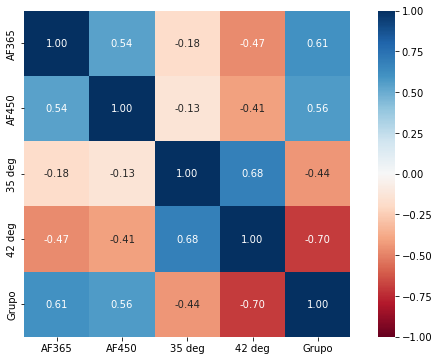

In [37]:
# Calcula coeficiente de correlación de Pearson
corr = datos.corr(method ='pearson')

fig = plt.figure(figsize=(10,6))

# HeatMap con tamaño ampliado, cuadrado, divergencia con colores y con anotaciones de 2 decimales
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap='RdBu',
    square=True, annot=True, fmt=".2f"
)

'''# Rota las etiquetas del eje horizontal
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)'''

plt.show()

# Guardar imagen
#plt.savefig("imagenes/matriz_correlacion.png", dpi=300)

## Distribución de los datos

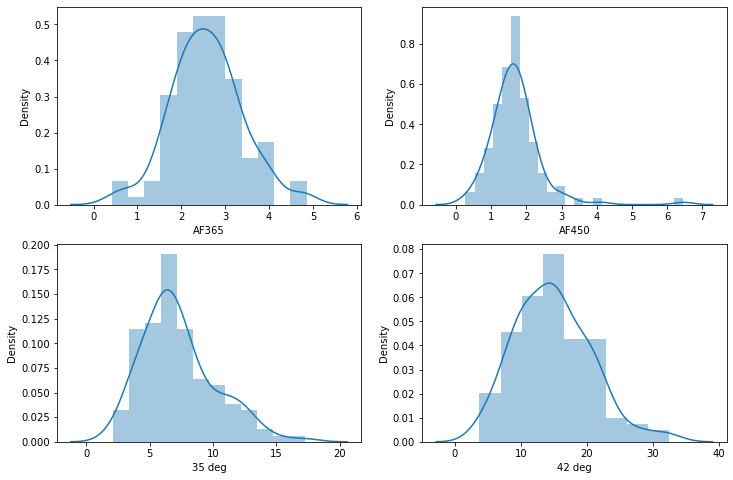

In [38]:
# Se crea la figura de 2x2
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

# Se crean los subgráficos
sns.distplot(datos['AF365'], ax=axes[0, 0])
sns.distplot(datos['AF450'], ax=axes[0, 1])
sns.distplot(datos['35 deg'], ax=axes[1, 0])
sns.distplot(datos['42 deg'], ax=axes[1, 1])

'''# Añadir título a los subgráficos
axes[0, 0].set(title='AF365')
axes[0, 1].set(title='AF450')
axes[1, 0].set(title='35ºC')
axes[1, 1].set(title='42ºC')'''

plt.show()

Las datos presentan una distribución aproximada a la normal por lo que se puede afirmar que el 99,7% de todos ellos se encuentran dentro de tres desviaciones estándar de la media. Por esto mismo, el umbral se fijará con este valor y, si algún dato se encuentra a una distancia mayor, será considerado como una anomalía

`35 deg` y `42 deg` presentan cierta asimetría y `AF450` tiene valores muy dispersos, por lo que se procederá a estudiar la presencia de outliers.

## Búsqueda de datos anómalos (outliers)

Se van a buscar los datos que se encuentren a una distancia mayor de 3 desviaciones de la media para considerarlos como anomalías y eliminarlos. Con esto se consigue reducir el ruido en el clasificador.

In [39]:
# Función de detección de outliers con el método de la desviación estándar
def detectar_outliers(df, columna):
    # Variables para almacenar los límites inferior y superior
    limite_inf = 0
    limite_sup = 0

    # Se calcula la media y la desviación estándar de la columna especificada
    media, desviacion = df[columna].mean(), df[columna].std()
    
    # Se calcula el valor de los límites inferior y superior
    limite_inf = media - (desviacion * 3)
    limite_sup = media + (desviacion * 3)
    print('El límite inferior es:', limite_inf)
    print('El limite superior es:', limite_sup)
    
    # Se calcula el número de instancias que están fuera de los límtes
    df1 = df[df[columna] > limite_sup]
    df2 = df[df[columna] < limite_inf]
    
    outliers = df1.shape[0] + df2.shape[0]
    
    print('---------------------------------------------')
    print('Número total de outliers:', outliers)
    
    if outliers > 0:
        print('---------------------------------------------')
        print('Instancias anómalas:')
        
        if len(df1) != 0:
            print(df1)
        if len(df2) != 0:
            print(df2)

In [40]:
detectar_outliers(datos, 'AF365')

El límite inferior es: 0.13349195588684815
El limite superior es: 5.0179465925647655
---------------------------------------------
Número total de outliers: 0


In [41]:
detectar_outliers(datos, 'AF450')

El límite inferior es: -0.5100419407327681
El limite superior es: 3.8766515696521227
---------------------------------------------
Número total de outliers: 2
---------------------------------------------
Instancias anómalas:
        AF365     AF450  35 deg  42 deg  Grupo
104  2.074074  6.458824    7.41   13.98      1
121  4.010000  4.110000    6.65   17.37      2


In [42]:
detectar_outliers(datos, '35 deg')

El límite inferior es: -1.4293622881705268
El limite superior es: 15.968555836557623
---------------------------------------------
Número total de outliers: 1
---------------------------------------------
Instancias anómalas:
       AF365     AF450  35 deg  42 deg  Grupo
21  2.603687  1.554795   17.29   29.27      0


In [43]:
detectar_outliers(datos, '42 deg')

El límite inferior es: -2.3783813832878913
El limite superior es: 32.10047815748145
---------------------------------------------
Número total de outliers: 1
---------------------------------------------
Instancias anómalas:
       AF365     AF450  35 deg  42 deg  Grupo
13  2.818713  1.271639   15.13   32.48      0


Si se visualizan los gráficos de bigotes, se aprecian mejor estos outliers

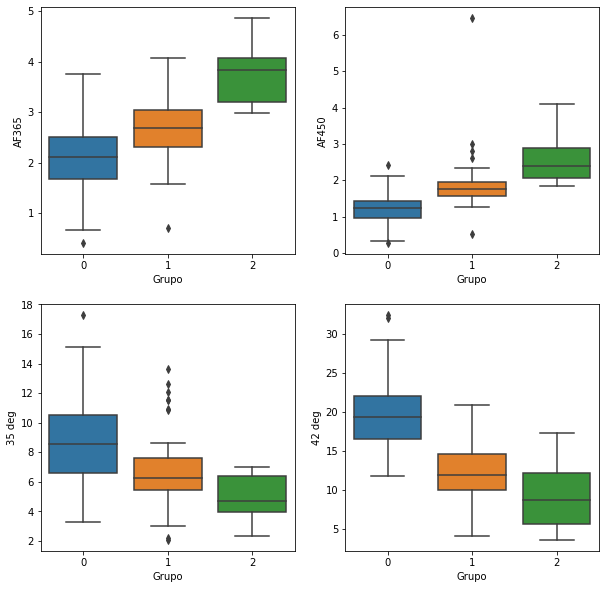

In [44]:
# Se crea la figura de 2x2
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Se crean los subgráficos
sns.boxplot(x=datos['Grupo'], y=datos['AF365'], data=datos, ax=axes[0, 0])
sns.boxplot(x=datos['Grupo'], y=datos['AF450'], data=datos, ax=axes[0, 1])
sns.boxplot(x=datos['Grupo'], y=datos['35 deg'], data=datos, ax=axes[1, 0])
sns.boxplot(x=datos['Grupo'], y=datos['42 deg'], data=datos, ax=axes[1, 1])

'''# Añadir título a los subgráficos
axes[0, 0].set(title='AF365')
axes[0, 1].set(title='AF450')
axes[1, 0].set(title='35ºC')
axes[1, 1].set(title='42ºC')'''

plt.show()

---

## Diagramas de dispersión

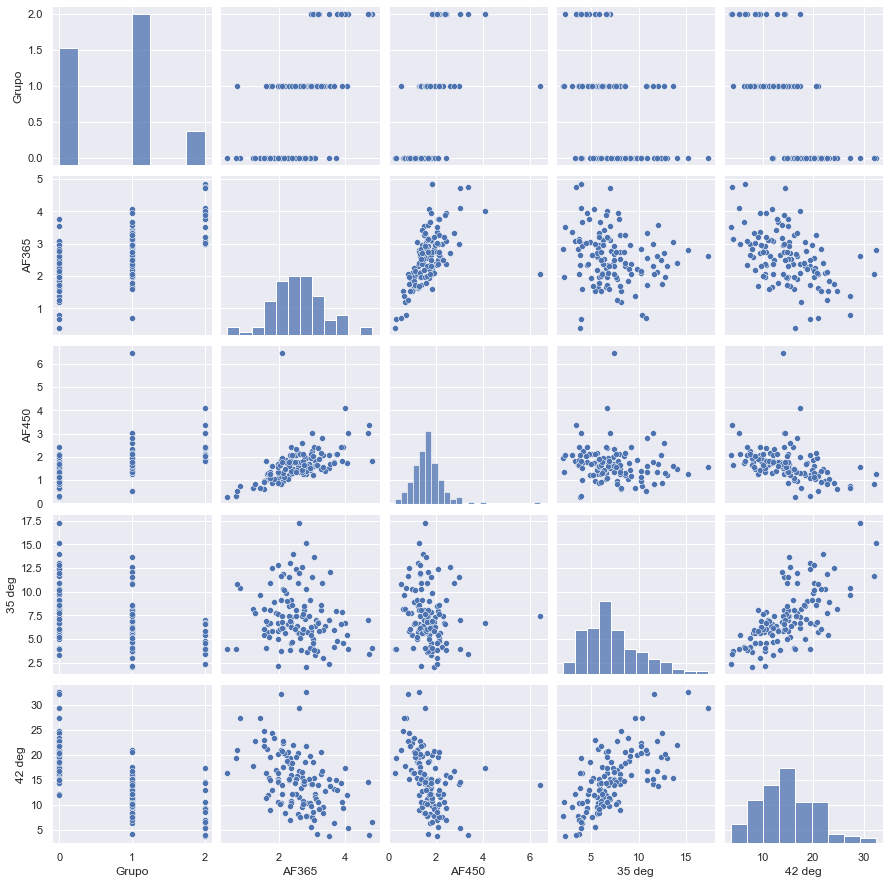

In [45]:
sns.set()
cols = ['Grupo', 'AF365', 'AF450', '35 deg', '42 deg']
sns.pairplot(datos[cols], size = 2.5)
plt.show()

# 3. Eliminar datos anómalos y guardar dataset filtrado

In [46]:
datos_filtrados = datos.drop([13, 21, 104, 121])

In [47]:
datos_filtrados

,AF365,AF450,35 deg,42 deg,Grupo
0,2.320158,1.229614,13.01,19.39,0
1,1.529274,0.616514,8.18,24.78,0
2,1.908257,0.955847,7.75,16.90,0
3,1.590625,1.018495,4.10,16.30,0
4,1.617071,1.242961,5.76,21.05,0
...,...,...,...,...,...
118,3.034884,2.051768,4.55,8.50,2
119,4.093525,3.037288,3.97,5.35,2
120,4.730000,3.040000,7.04,14.44,2
122,3.200000,2.360000,6.70,10.57,2


In [48]:
datos_filtrados = datos_filtrados.reset_index(drop=True)

In [49]:
datos_filtrados

,AF365,AF450,35 deg,42 deg,Grupo
0,2.320158,1.229614,13.01,19.39,0
1,1.529274,0.616514,8.18,24.78,0
2,1.908257,0.955847,7.75,16.90,0
3,1.590625,1.018495,4.10,16.30,0
4,1.617071,1.242961,5.76,21.05,0
...,...,...,...,...,...
115,3.034884,2.051768,4.55,8.50,2
116,4.093525,3.037288,3.97,5.35,2
117,4.730000,3.040000,7.04,14.44,2
118,3.200000,2.360000,6.70,10.57,2


## Distribución de los datos

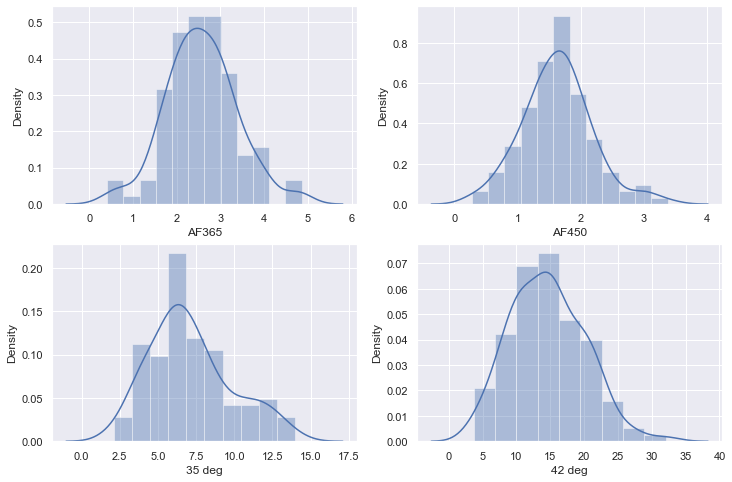

In [50]:
# Se crea la figura de 2x2
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8)) # 2rows 2columns

# Se crean los subgráficos
sns.distplot(datos_filtrados['AF365'], ax=axes[0, 0])
sns.distplot(datos_filtrados['AF450'], ax=axes[0, 1])
sns.distplot(datos_filtrados['35 deg'], ax=axes[1, 0])
sns.distplot(datos_filtrados['42 deg'], ax=axes[1, 1])

'''# Añadir título a los subgráficos
axes[0, 0].set(title='AF365')
axes[0, 1].set(title='AF450')
axes[1, 0].set(title='35ºC')
axes[1, 1].set(title='42ºC')'''

plt.show()

La distribución de los datos para cada variables ha mejorado y se asemeja más a una distribución normal.

---

## Distribución de los datos separados por grupos

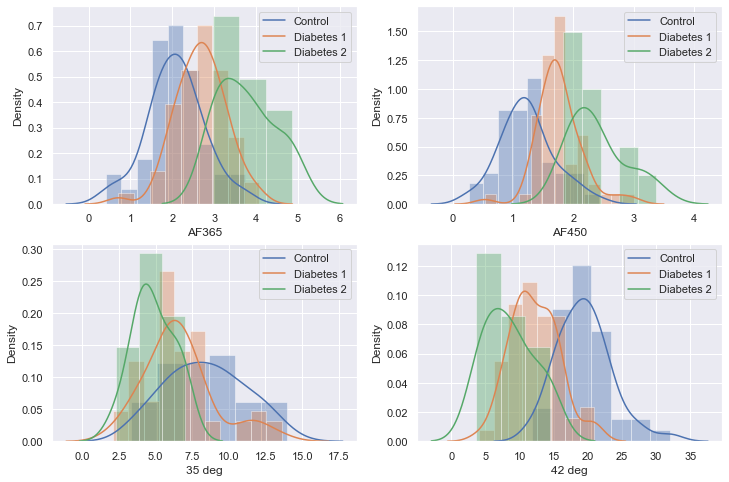

In [51]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

sns.distplot(datos_filtrados[datos_filtrados['Grupo']==0]['AF365'], ax=ax[0][0])
sns.distplot(datos_filtrados[datos_filtrados['Grupo']==1]['AF365'], ax=ax[0][0])
sns.distplot(datos_filtrados[datos_filtrados['Grupo']==2]['AF365'], ax=ax[0][0])
ax[0][0].legend(['Control','Diabetes 1', 'Diabetes 2'])
#ax[0][0].set_title('AF365')

sns.distplot(datos_filtrados[datos_filtrados['Grupo']==0]['AF450'], ax=ax[0][1])
sns.distplot(datos_filtrados[datos_filtrados['Grupo']==1]['AF450'], ax=ax[0][1])
sns.distplot(datos_filtrados[datos_filtrados['Grupo']==2]['AF450'], ax=ax[0][1])
ax[0][1].legend(['Control','Diabetes 1', 'Diabetes 2'])
#ax[0][1].set_title('AF450')

sns.distplot(datos_filtrados[datos_filtrados['Grupo']==0]['35 deg'], ax=ax[1][0])
sns.distplot(datos_filtrados[datos_filtrados['Grupo']==1]['35 deg'], ax=ax[1][0])
sns.distplot(datos_filtrados[datos_filtrados['Grupo']==2]['35 deg'], ax=ax[1][0])
ax[1][0].legend(['Control','Diabetes 1', 'Diabetes 2'])
#ax[1][0].set_title('35 deg')

sns.distplot(datos_filtrados[datos_filtrados['Grupo']==0]['42 deg'], ax=ax[1][1])
sns.distplot(datos_filtrados[datos_filtrados['Grupo']==1]['42 deg'], ax=ax[1][1])
sns.distplot(datos_filtrados[datos_filtrados['Grupo']==2]['42 deg'], ax=ax[1][1])
ax[1][1].legend(['Control','Diabetes 1', 'Diabetes 2'])
#ax[1][1].set_title('42 deg')

plt.show()

### Guardar dataset filtrado

In [23]:
datos_filtrados.shape

(120, 5)

In [24]:
datos_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AF365   120 non-null    float64
 1   AF450   120 non-null    float64
 2   35 deg  120 non-null    float64
 3   42 deg  120 non-null    float64
 4   Grupo   120 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.8 KB


In [25]:
# Guardar dataframe
datos_filtrados.to_csv('datos_filtrados.csv', header=True, index=False)

In [26]:
# Comprobación
df_comprobar = pd.read_csv('datos_filtrados.csv')
df_comprobar

,AF365,AF450,35 deg,42 deg,Grupo
0,2.320158,1.229614,13.01,19.39,0
1,1.529274,0.616514,8.18,24.78,0
2,1.908257,0.955847,7.75,16.90,0
3,1.590625,1.018495,4.10,16.30,0
4,1.617071,1.242961,5.76,21.05,0
...,...,...,...,...,...
115,3.034884,2.051768,4.55,8.50,2
116,4.093525,3.037288,3.97,5.35,2
117,4.730000,3.040000,7.04,14.44,2
118,3.200000,2.360000,6.70,10.57,2


In [27]:
df_comprobar.shape

(120, 5)

In [28]:
df_comprobar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AF365   120 non-null    float64
 1   AF450   120 non-null    float64
 2   35 deg  120 non-null    float64
 3   42 deg  120 non-null    float64
 4   Grupo   120 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.8 KB
